# Dispersion-Relation-Preserving Finite Differences (DRP-FD)
by Manuel A. Diaz @ IAM.NTU 2015

Refs.: 
1. Tam, C. K., & Webb, J. C. (1993). Dispersion-relation-preserving finite difference schemes for computational acoustics. Journal of computational physics, 107(2), 262-281. **(Centered scheme with N=3)**
2. Tam, C. K., & Dong, Z. (1994). Wall boundary conditions for high-order finite-difference schemes in computational aeroacoustics. Theoretical and Computational Fluid Dynamics, 6(5), 303-322. **(Boundary scheme with N=3)**
3. Bogey, C., & Bailly, C. (2004). A family of low dispersive and low dissipative explicit schemes for flow and noise computations. Journal of Computational physics, 194(1), 194-214. **(Centered schemes with N={3,4,5} and Filters)**
4. Lin, R. K., & Sheu, T. W. (2005). Application of dispersion-relation-preserving theory to develop a two-dimensional convection–diffusion scheme. Journal of Computational Physics, 208(2), 493-526. **(2-d cented scheme with N=1)**

### Preamble

In [1]:
# Load numpy and everything from sympy
import numpy as np
from sympy import *
init_printing(use_unicode=True)

### Finite Difference Stencil

The central finite difference stencil for the first derivative is given by

$$
\left(\frac{\partial u}{\partial x}\right)_l 
= \frac{1}{h} \sum_{j=-N}^{M} a_j f_{l+j}
= \frac{1}{h} \left[ a_{-N} f_{l-N} + a_{-N+1} f_{l-N+1} + \cdots + a_{M-1} f_{l+M-1} + a_M f_{l+M} \right]
$$

The coefficients $a_j$ are determined by the Taylor series expansion of $f_{l\pm j}$ about $x = 0$:

$$
f_{l+j} = f_l + j h f'_l + \frac{j^2 h^2}{2} f''_l + \cdots + \frac{j^n h^n}{n!} f^{(n)}_l,
$$

and

$$
f_{l-j} = f_l - j h f'_l + \frac{j^2 h^2}{2} f''_l - \cdots + \frac{j^n h^n}{n!} f^{(n)}_l.
$$

where $f^{(n)}_l$ is the $n$-th derivative of $f$ evaluated at $x = l h$. The coefficients $a_j$ are determined by matching the Taylor series expansion of the finite difference stencil with the Taylor series expansion of the derivative:

$$
\left(\frac{\partial u}{\partial x}\right)_l = \frac{1}{h} \sum_{j=-N}^{M} a_j f_{l+j} = \frac{1}{h} \sum_{j=-N}^{M} a_j \left[ f_l + j h f'_l + \frac{j^2 h^2}{2} f''_l + \cdots + \frac{j^n h^n}{n!} f^{(n)}_l \right].
$$

## DRP4 (N=3, 7-points)

### Centered Finite Difference Stencil

Let us consider the case of $N=M=3$. The stencil is given by

$$
f'_l = \frac{a_{-3} f_{l-3} + a_{-2} f_{l-2} + a_{-1} f_{l-1} + a_0 f_l + a_1 f_{l+1} + a_2 f_{l+2} + a_3 f_{l+3}}{h}.
$$

The Taylor series expansion of the stencil up to 4-th order reads

$$
\begin{aligned}
    h f'_l &=  h f'_l, \\
    a_{-3} f_{l-3} &= a_{-3} f_l - (3h) a_{-3} f'_l + \frac{9 h^2}{2} a_{-3} f''_l - \frac{27 h^3}{6} a_{-3} f'''_l + \frac{81 h^4}{24} a_{-3} f^{(4)}_l + O(h^5), \\
    a_{-2} f_{l-2} &= a_{-2} f_l - (2h) a_{-2} f'_l + \frac{4 h^2}{2} a_{-2} f''_l - \frac{8 h^3}{6} a_{-2} f'''_l + \frac{16 h^4}{24} a_{-2} f^{(4)}_l + O(h^5), \\
    a_{-1} f_{l-1} &= a_{-1} f_l - (h) a_{-1} f'_l + \frac{h^2}{2} a_{-1} f''_l - \frac{h^3}{6} a_{-1} f'''_l + \frac{h^4}{24} a_{-1} f^{(4)}_l + O(h^5), \\
    a_0 f_l &= a_0 f_l, \\
    a_1 f_{l+1} &= a_1 f_l + (h) a_1 f'_l + \frac{h^2}{2} a_1 f''_l + \frac{h^3}{6} a_1 f'''_l + \frac{h^4}{24} a_1 f^{(4)}_l + O(h^5), \\
    a_2 f_{l+2} &= a_2 f_l + (2h) a_2 f'_l + \frac{4 h^2}{2} a_2 f''_l + \frac{8 h^3}{6} a_2 f'''_l + \frac{16 h^4}{24} a_2 f^{(4)}_l + O(h^5), \\
    a_3 f_{l+3} &= a_3 f_l + (3h) a_3 f'_l + \frac{9 h^2}{2} a_3 f''_l + \frac{27 h^3}{6} a_3 f'''_l + \frac{81 h^4}{24} a_3 f^{(4)}_l + O(h^5).
\end{aligned}
$$

The following relations are obtained by matching the Taylor series expansion of the stencil with the Taylor series expansion of the derivative:

$$
\begin{aligned}
    a_{-3} + a_{-2} + a_{-1} + a_0 + a_1 + a_2 + a_3 &= 0, \\
    -3 a_{-3} - 2 a_{-2} - a_{-1} + a_1 + 2 a_2 + 3 a_3 &= 1, \\
    9 a_{-3} + 4 a_{-2} + a_{-1} + a_1 + 4 a_2 + 9 a_3 &= 0, \\
    -27 a_{-3} - 8 a_{-2} - a_{-1} + a_1 + 8 a_2 + 27 a_3 &= 0, \\
    81 a_{-3} + 16 a_{-2} + a_{-1} + a_1 + 16 a_2 + 81 a_3 &= 0.
\end{aligned}
$$

Notice that in the centered stencil, the central coefficient is $a_0 = 0$ and the coefficients are expected to be $a_{-j} = -a_j$ due to symmetry. However, we are still left with 6 unknowns and only 5 equations. An extra condition is required to fully determine the coefficients. This condition will be given by requesting the dipersion of the finite difference scheme to approximate that of the equivalent Fourier series. For now, let's use assume that $a_1$ is a free parameter and rewrite the equations in matrix form:

$$
\begin{bmatrix}
    1 & 1 & 1 & 1 & 1 \\
    -3 & -2 & -1 & 2 & 3 \\
    9 & 4 & 1 & 4 & 9 \\
    -27 & -8 & -1 & 8 & 27 \\
    81 & 16 & 1 & 16 & 81
\end{bmatrix}
\begin{bmatrix}
    a_{-3} \\
    a_{-2} \\
    a_{-1} \\
    a_2 \\
    a_3
\end{bmatrix}
=
\begin{bmatrix}
    -a_{1} \\
    1-a_{1} \\
    -a_{1} \\
    -a_{1} \\
    -a_{1}
\end{bmatrix}.
$$

### Build Taylor-Table

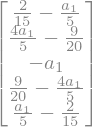

In [2]:
# Stencil coefficients
var('a_m3 a_m2 a_m1 a0 a1 a2 a3', real=true)

# Grid spacing
var('h', positive=true)

# Solve the linear system
matrix = Matrix([
    [1,1,1,1,1],
    [-3,-2,-1,2,3],
    [9,4,1,4,9],
    [-27,-8,-1,8,27],
    [81,16,1,16,81]])
rhs = Matrix([-a1,1-a1,-a1,-a1,-a1])

coefs = matrix.inv() * rhs
coefs

### Fourier Series and Dispersion Relation Preserving

Recal that the Fourier transformation of a function $f(x)$ and its inverse is given by

$$
\begin{aligned}
    \hat{f}(k) &= \frac{1}{2\pi} \int_{-\infty}^{\infty} f(x) e^{-i k x} dx, \\
    f(x) &= \int_{-\infty}^{\infty} \hat{f}(k) e^{i k x} dk.
\end{aligned}
$$

Applying the Fourier transformation to both sides of expression $f'_l$, we obtain

$$
\begin{aligned}
    i k \hat{f}(k) &= \frac{1}{h} \sum_{j=-N}^{M} a_j \hat{f}(k) e^{i k j h} \\
    i k \hat{f}(k) &= \frac{1}{h} (a_{-3} e^{-3 i k h} + a_{-2} e^{-2 i k h} + a_{-1} e^{-i k h} + a_1 e^{i k h} + a_2 e^{2 i k h} + a_3 e^{3 i k h}) \hat{f}(k) \\
    i k h &= a_{-3} e^{-3 i k h} + a_{-2} e^{-2 i k h} + a_{-1} e^{-i k h} + a_1 e^{i k h} + a_2 e^{2 i k h} + a_3 e^{3 i k h} \\
\end{aligned}
$$

Let us, substitute the terms $a_{j}$ in terms of $a_1$ (our chosen free-parameter) to obtain

$$
i k h - \left(
    (\tfrac{2}{15} - \tfrac{a_1}{5}) e^{-3 i k h} + (\tfrac{4a_1}{5}-\tfrac{9}{20}) e^{-2 i k h} - a_{1} e^{-i k h} + a_1 e^{i k h} + (\tfrac{9}{20}-\tfrac{4a_1}{5}) e^{2 i k h} + (\tfrac{a_1}{5} - \tfrac{2}{15}) e^{3 i k h} 
    \right) = 0
$$

At this point we are interested in minimizing the integrate of the square of the error between the dispersion relation of the finite difference scheme and the dispersion relation of the Fourier series. The error is given by

$$
\begin{aligned}
\epsilon &= \int_{-\pi/2}^{\pi/2} \left| i k h - \left(
    (\tfrac{2}{15} - \tfrac{a_1}{5}) e^{-3 i k h} + (\tfrac{4a_1}{5}-\tfrac{9}{20}) e^{-2 i k h} - a_{1} e^{-i k h} + a_1 e^{i k h} + (\tfrac{9}{20}-\tfrac{4a_1}{5}) e^{2 i k h} + (\tfrac{a_1}{5} - \tfrac{2}{15}) e^{3 i k h} 
    \right) \right|^2 d(k h), \\
\epsilon &= \int_{-\pi/2}^{\pi/2} \left| i \theta - \left(
    (\tfrac{2}{15} - \tfrac{a_1}{5}) e^{-3 i \theta} + (\tfrac{4a_1}{5}-\tfrac{9}{20}) e^{-2 i \theta} - a_{1} e^{-i \theta} + a_1 e^{i \theta} + (\tfrac{9}{20}-\tfrac{4a_1}{5}) e^{2 i \theta} + (\tfrac{a_1}{5} - \tfrac{2}{15}) e^{3 i \theta} 
    \right) \right|^2 d\theta, \\
\epsilon &= \int_{-\pi/2}^{\pi/2} \left| i \theta -   2 i \left(
    a_{1} \sin\theta + (\tfrac{9}{20}-\tfrac{4a_1}{5}) \sin(2\theta) + (\tfrac{a_1}{5}-\tfrac{2}{15}) \sin(3\theta)
    \right) \right|^2 d\theta, \\
\epsilon &= -\int_{-\pi/2}^{\pi/2} \left| \theta -   2 \left(
    a_{1} \sin\theta + (\tfrac{9}{20}-\tfrac{4a_1}{5}) \sin(2\theta) + (\tfrac{a_1}{5}-\tfrac{2}{15}) \sin(3\theta)
    \right) \right|^2 d\theta, \\
\end{aligned}
$$

where $d(k h) = \frac{1}{2\pi} dk$ is the measure of the integral. As we seek to produce

$$ 
\frac{\partial \epsilon}{\partial a_1} = 0.
$$

The integral can be computed numerically by using the trapezoidal rule.

### Minimization Error to find DRP4 (N=3)

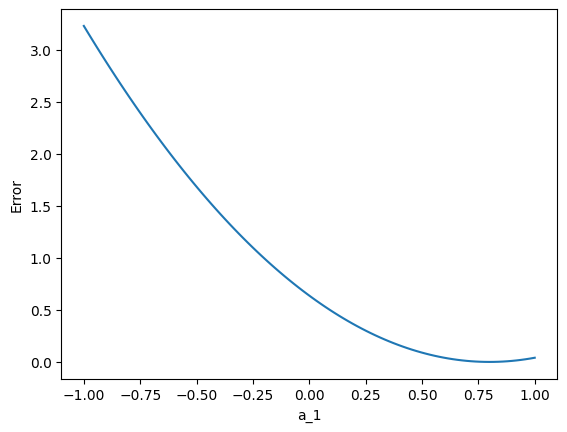

In [3]:
import matplotlib.pyplot as plt

# Define integrand 
th, a = symbols('theta, a')

integrand = (th - 2 * (a*sin(th) + (9/20-4*a/5)*sin(2*th) + (a/5-2/15)*sin(3*th)))**2

# Define error as a function of a_1
error = lambda a_: Integral(integrand.subs(a, a_), (th, -pi/2, pi/2)).evalf()

# Plot the error
a_vals = np.linspace(-1.0, 1.0, 100)
errors = [error(a_val) for a_val in a_vals]
plt.plot(a_vals, errors)
plt.xlabel('a_1')
plt.ylabel('Error')
plt.show() 

The minimun exist, but SymPy is not able to find it. I'll use SciPy to find the minimum of the error.

In [4]:
from scipy.integrate import quad
from scipy.optimize import minimize

# Define error function using scipy quad
def error(a_):
    intgrl, abserr = quad(lambda th: (th - 2 * (a_*np.sin(th) + (9/20-4*a_/5)*np.sin(2*th) + (a_/5-2/15)*np.sin(3*th)))**2, -np.pi/2, np.pi/2, epsabs=1e-14, epsrel=1e-14)
    return intgrl

# Find minimum of error function
minimum = minimize(error, 0.0, tol=1e-14)

# Print the value of the chosen free-parameter coefficient
print('a_1 = ', minimum.x[0])

a_1 =  0.7992664205807827


In [5]:
# Get coefficients of DRP central scheme
a_m3,a_m2,a_m1,a2,a3 = coefs.subs(a1, minimum.x[0])
a0 = 0.
a1 = minimum.x[0]
a_m3,a_m2,a_m1,a0,a1,a2,a3

Perfect! We reprocude the results of Tam and Webb (1993) for the centered finite difference stencil.

## DRP4 (N=4, 9-points) 

### Centered Finite Difference Stencil

Let us consider the case of $N=M=4$. The stencil is given by

$$
f'_l = \frac{a_{-4} f_{l-4} + a_{-3} f_{l-3} + a_{-2} f_{l-2} + a_{-1} f_{l-1} + a_0 f_l + a_1 f_{l+1} + a_2 f_{l+2} + a_3 f_{l+3} + a_4 f_{l+4}}{h}.
$$

The Taylor series expansion of the stencil up to 4-th order reads

$$
\begin{aligned}
    h f'_l &=  h f'_l, \\
    a_{-4} f_{l-4} &= a_{-4} f_l - (4h) a_{-4} f'_l + \frac{16 h^2}{2} a_{-4} f''_l - \frac{64 h^3}{6} a_{-4} f'''_l + \frac{256 h^4}{24} a_{-4} f^{(4)}_l + O(h^5), \\
    a_{-3} f_{l-3} &= a_{-3} f_l - (3h) a_{-3} f'_l + \frac{9 h^2}{2} a_{-3} f''_l - \frac{27 h^3}{6} a_{-3} f'''_l + \frac{81 h^4}{24} a_{-3} f^{(4)}_l + O(h^5), \\
    a_{-2} f_{l-2} &= a_{-2} f_l - (2h) a_{-2} f'_l + \frac{4 h^2}{2} a_{-2} f''_l - \frac{8 h^3}{6} a_{-2} f'''_l + \frac{16 h^4}{24} a_{-2} f^{(4)}_l + O(h^5), \\
    a_{-1} f_{l-1} &= a_{-1} f_l - (h) a_{-1} f'_l + \frac{h^2}{2} a_{-1} f''_l - \frac{h^3}{6} a_{-1} f'''_l + \frac{h^4}{24} a_{-1} f^{(4)}_l + O(h^5), \\
    a_0 f_l &= a_0 f_l, \\
    a_1 f_{l+1} &= a_1 f_l + (h) a_1 f'_l + \frac{h^2}{2} a_1 f''_l + \frac{h^3}{6} a_1 f'''_l + \frac{h^4}{24} a_1 f^{(4)}_l + O(h^5), \\
    a_2 f_{l+2} &= a_2 f_l + (2h) a_2 f'_l + \frac{4 h^2}{2} a_2 f''_l + \frac{8 h^3}{6} a_2 f'''_l + \frac{16 h^4}{24} a_2 f^{(4)}_l + O(h^5), \\
    a_3 f_{l+3} &= a_3 f_l + (3h) a_3 f'_l + \frac{9 h^2}{2} a_3 f''_l + \frac{27 h^3}{6} a_3 f'''_l + \frac{81 h^4}{24} a_3 f^{(4)}_l + O(h^5), \\
    a_4 f_{l+4} &= a_4 f_l + (4h) a_4 f'_l + \frac{16 h^2}{2} a_4 f''_l + \frac{64 h^3}{6} a_4 f'''_l + \frac{256 h^4}{24} a_4 f^{(4)}_l + O(h^5).
\end{aligned}
$$

The following relations are obtained by matching the Taylor series expansion of the stencil with the Taylor series expansion of the derivative:

$$
\begin{aligned}
    a_{-4} + a_{-3} + a_{-2} + a_{-1} + a_0 + a_1 + a_2 + a_3 + a_4 &= 0, \\
    -4 a_{-4} - 3 a_{-3} - 2 a_{-2} - a_{-1} + a_1 + 2 a_2 + 3 a_3 + 4 a_4 &= 1, \\
    16 a_{-4} + 9 a_{-3} + 4 a_{-2} + a_{-1} + a_1 + 4 a_2 + 9 a_3 + 16 a_4 &= 0, \\
    -64 a_{-4} - 27 a_{-3} - 8 a_{-2} - a_{-1} + a_1 + 8 a_2 + 27 a_3 + 64 a_4 &= 0, \\
    256 a_{-4} + 81 a_{-3} + 16 a_{-2} + a_{-1} + a_1 + 16 a_2 + 81 a_3 + 256 a_4 &= 0.
\end{aligned}
$$

Notice that in the centered stencil, the central coefficient is $a_0 = 0$ and the coefficients are expected to be $a_{-j} = -a_j$ due to symmetry. As a result the above system reduces to 

$$
\begin{aligned}
    a_1 + 2 a_2 + 3 a_3 + 4 a_4 &= 1/2, \\
    a_1 + 8 a_2 + 27 a_3 + 64 a_4 &= 0, \\
\end{aligned}
$$

In this case we have 4 unknowns and 2 equations. We need to find 2 more equations to fully determine the coefficients. The extra conditions will be given by requesting that error integral, as proposed in Bogey 2004, to be minimized. The error is given by 

$$
\epsilon = -\int_{\ln(kh)_l}^{\ln(kh)_h} |kh - 2\sum_{j=1}^{4}a_j\sin(jkh)| \; d(\ln(kh)),
$$

For now, let's use assume that $a_1$ and $a_2$ are free parameters. They are determined by finding

$$
\frac{\partial \epsilon}{\partial a_1} = 0, \quad \frac{\partial \epsilon}{\partial a_2} = 0.
$$

Which needs the use a two-variable minimization problem. (This is not so easy becuase local minimun occur, this is why Bogey give tighter integration limits. I'll come back to this later)

## DRP4 (N=5, 11-points)

### Centered Finite Difference Stencil

Let us consider the case of $N=M=4$. The stencil is given by

$$
f'_l = \frac{a_{-5} f_{l-5} + a_{-4} f_{l-4} + a_{-3} f_{l-3} + a_{-2} f_{l-2} + a_{-1} f_{l-1} + a_0 f_l + a_1 f_{l+1} + a_2 f_{l+2} + a_3 f_{l+3} + a_4 f_{l+4} + a_5 f_{l+5}}{h}.
$$ 

The Taylor series expansion of the stencil up to 4-th order reads

$$
\begin{aligned}
    h f'_l &=  h f'_l, \\
    a_{-5} f_{l-5} &= a_{-5} f_l - (5h) a_{-5} f'_l + \frac{25 h^2}{2} a_{-5} f''_l - \frac{125 h^3}{6} a_{-5} f'''_l + \frac{625 h^4}{24} a_{-5} f^{(4)}_l + O(h^5), \\
    a_{-4} f_{l-4} &= a_{-4} f_l - (4h) a_{-4} f'_l + \frac{16 h^2}{2} a_{-4} f''_l - \frac{64 h^3}{6} a_{-4} f'''_l + \frac{256 h^4}{24} a_{-4} f^{(4)}_l + O(h^5), \\
    a_{-3} f_{l-3} &= a_{-3} f_l - (3h) a_{-3} f'_l + \frac{9 h^2}{2} a_{-3} f''_l - \frac{27 h^3}{6} a_{-3} f'''_l + \frac{81 h^4}{24} a_{-3} f^{(4)}_l + O(h^5), \\
    a_{-2} f_{l-2} &= a_{-2} f_l - (2h) a_{-2} f'_l + \frac{4 h^2}{2} a_{-2} f''_l - \frac{8 h^3}{6} a_{-2} f'''_l + \frac{16 h^4}{24} a_{-2} f^{(4)}_l + O(h^5), \\
    a_{-1} f_{l-1} &= a_{-1} f_l - (h) a_{-1} f'_l + \frac{h^2}{2} a_{-1} f''_l - \frac{h^3}{6} a_{-1} f'''_l + \frac{h^4}{24} a_{-1} f^{(4)}_l + O(h^5), \\
    a_0 f_l &= a_0 f_l, \\
    a_1 f_{l+1} &= a_1 f_l + (h) a_1 f'_l + \frac{h^2}{2} a_1 f''_l + \frac{h^3}{6} a_1 f'''_l + \frac{h^4}{24} a_1 f^{(4)}_l + O(h^5), \\
    a_2 f_{l+2} &= a_2 f_l + (2h) a_2 f'_l + \frac{4 h^2}{2} a_2 f''_l + \frac{8 h^3}{6} a_2 f'''_l + \frac{16 h^4}{24} a_2 f^{(4)}_l + O(h^5), \\
    a_3 f_{l+3} &= a_3 f_l + (3h) a_3 f'_l + \frac{9 h^2}{2} a_3 f''_l + \frac{27 h^3}{6} a_3 f'''_l + \frac{81 h^4}{24} a_3 f^{(4)}_l + O(h^5), \\
    a_4 f_{l+4} &= a_4 f_l + (4h) a_4 f'_l + \frac{16 h^2}{2} a_4 f''_l + \frac{64 h^3}{6} a_4 f'''_l + \frac{256 h^4}{24} a_4 f^{(4)}_l + O(h^5), \\
    a_5 f_{l+5} &= a_5 f_l + (5h) a_5 f'_l + \frac{25 h^2}{2} a_5 f''_l + \frac{125 h^3}{6} a_5 f'''_l + \frac{625 h^4}{24} a_5 f^{(4)}_l + O(h^5).
\end{aligned}
$$

The following relations are obtained by matching the Taylor series expansion of the stencil with the Taylor series expansion of the derivative:

$$
\begin{aligned}
    a_{-5} + a_{-4} + a_{-3} + a_{-2} + a_{-1} + a_0 + a_1 + a_2 + a_3 + a_4 + a_5 &= 0, \\
    -5 a_{-5} - 4 a_{-4} - 3 a_{-3} - 2 a_{-2} - a_{-1} + a_1 + 2 a_2 + 3 a_3 + 4 a_4 + 5 a_5 &= 1, \\
    25 a_{-5} + 16 a_{-4} + 9 a_{-3} + 4 a_{-2} + a_{-1} + a_1 + 4 a_2 + 9 a_3 + 16 a_4 + 25 a_5 &= 0, \\
    -125 a_{-5} - 64 a_{-4} - 27 a_{-3} - 8 a_{-2} - a_{-1} + a_1 + 8 a_2 + 27 a_3 + 64 a_4 + 125 a_5 &= 0, \\
    625 a_{-5} + 256 a_{-4} + 81 a_{-3} + 16 a_{-2} + a_{-1} + a_1 + 16 a_2 + 81 a_3 + 256 a_4 + 625 a_5 &= 0.
\end{aligned}
$$

Notice that in the centered stencil, the central coefficient is $a_0 = 0$ and the coefficients are expected to be $a_{-j} = -a_j$ due to symmetry. As a result the above system reduces to

$$
\begin{aligned}
    a_1 + 2 a_2 + 3 a_3 + 4 a_4 + 5 a_5 &= 1/2, \\
    a_1 + 8 a_2 + 27 a_3 + 64 a_4 + 125 a_5 &= 0, \\
\end{aligned}
$$

In this case we have 5 unknowns and 2 equations. We need to find 3 more equations to fully determine the coefficients. The extra conditions will be given by requesting that error integral, as proposed in Bogey 2004, to be minimized. The error is given by

$$
\epsilon = -\int_{\ln(kh)_l}^{\ln(kh)_h} |kh - 2\sum_{j=1}^{5}a_j\sin(jkh)| \; d(\ln(kh)),
$$

For now, let's use assume that $a_1$, $a_2$ and $a_3$ are free parameters. They are determined by finding

$$
\frac{\partial \epsilon}{\partial a_1} = 0, \quad \frac{\partial \epsilon}{\partial a_2} = 0, \quad \frac{\partial \epsilon}{\partial a_3} = 0.
$$

Which needs the use a three-variable minimization problem. (This is not so easy becuase local minimun occur, this is why Bogey give tighter integration limits. I'll come back to this later)

## Verify Frequency Response of DRP-FD schemes

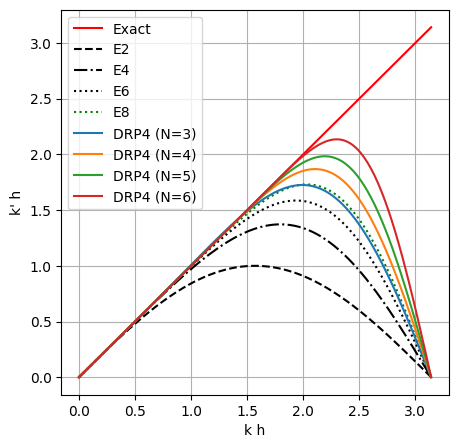

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the wave number space
k_range = np.linspace(0, np.pi, 200)

# Define coefficients of Explicit (finite difference) central schemes
E2_coefs = np.array([-1/2, 0, 1/2])
E4_coefs = np.array([1/12, -2/3, 0, 2/3, -1/12])
E6_coefs = np.array([-1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60])
E8_coefs = np.array([1/280, -4/105, 1/5, -4/5, 0, 4/5, -1/5, 4/105, -1/280])

# Define coefficients of DRP (finite difference) central schemes
DRP4_N3_coefs = np.array([a_m3,a_m2,a_m1,a0,a1,a2,a3])
DRP4_N4_coefs = np.array([0.007650904064, -0.059463584768, 0.244678631765, -0.841570125482, 0, 
                          0.841570125482, -0.244678631765, 0.059463584768, -0.007650904064])
DRP4_N5_coefs = np.array([-0.002484594688, 0.020779405824, -0.090320001280, 0.286511173973, -0.872756993962, 0, 
                          0.872756993962, -0.286511173973, 0.090320001280, -0.020779405824, 0.002484594688])
DRP4_N6_coefs = np.array([0.001456501759, -0.011169294114, 0.045246480208, -0.133442885327, 0.337048393268, -0.907646591371, 0,
                          0.907646591371, -0.337048393268, 0.133442885327, -0.045246480208, 0.011169294114, -0.001456501759])


# Assume grid spacing h=1
h = 1.0

# Allocate space for the frequency response
E2 = np.zeros_like(k_range, dtype=np.complex_)
E4 = np.zeros_like(k_range, dtype=np.complex_)
E6 = np.zeros_like(k_range, dtype=np.complex_)
E8 = np.zeros_like(k_range, dtype=np.complex_)
DRP4N3 = np.zeros_like(k_range, dtype=np.complex_)
DRP4N4 = np.zeros_like(k_range, dtype=np.complex_)
DRP4N5 = np.zeros_like(k_range, dtype=np.complex_)
DRP4N6 = np.zeros_like(k_range, dtype=np.complex_)

# Compute frequency response of explicit central schemes
for i in range(len(k_range)):
    E2[i] = np.sum(E2_coefs * np.exp(1j * np.arange(-1, 2) * k_range[i] * h))
    E4[i] = np.sum(E4_coefs * np.exp(1j * np.arange(-2, 3) * k_range[i] * h))
    E6[i] = np.sum(E6_coefs * np.exp(1j * np.arange(-3, 4) * k_range[i] * h))
    E8[i] = np.sum(E8_coefs * np.exp(1j * np.arange(-4, 5) * k_range[i] * h))
    DRP4N3[i] = np.sum(DRP4_N3_coefs * np.exp(1j * np.arange(-3, 4) * k_range[i] * h))
    DRP4N4[i] = np.sum(DRP4_N4_coefs * np.exp(1j * np.arange(-4, 5) * k_range[i] * h))
    DRP4N5[i] = np.sum(DRP4_N5_coefs * np.exp(1j * np.arange(-5, 6) * k_range[i] * h))
    DRP4N6[i] = np.sum(DRP4_N6_coefs * np.exp(1j * np.arange(-6, 7) * k_range[i] * h))

# Plot the frequency response (Only the imaginary part)
plt.figure(figsize=(5, 5))
plt.plot(k_range, k_range, "-r", label='Exact')
plt.plot(k_range, np.imag(E2), "--k", label='E2')
plt.plot(k_range, np.imag(E4), "-.k",  label='E4')
plt.plot(k_range, np.imag(E6), ":k", label='E6')
plt.plot(k_range, np.imag(E8), ":g", label='E8')
plt.plot(k_range, np.imag(DRP4N3), "-", label='DRP4 (N=3)')
plt.plot(k_range, np.imag(DRP4N4), "-", label='DRP4 (N=4)')
plt.plot(k_range, np.imag(DRP4N5), "-", label='DRP4 (N=5)')
plt.plot(k_range, np.imag(DRP4N6), "-", label='DRP4 (N=6)')
plt.xlabel("k h")
plt.ylabel("k' h")
plt.legend()
plt.grid(True)

In other words: The DRP4 (N=3) scheme is a fourth-order accurate scheme capable of resolving waves as good as an 8-th order explicit scheme.

NOTES:
* A non-symmetric scheme used for the boundary conditions is given by Tam and Dong (1994).
* Filters are used to reduce the dispersion and dissipation errors of the scheme. A family of low dispersive and low dissipative explicit schemes for flow and noise computations is given by Bogey and Bailly (2004).
* An extension into 2-d is given by Lin and Sheu (2005).

Happy coding! 
--M.D.

## EoF